In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, roc_auc_score


In [ ]:
data = pd.read_csv("cardio_train.csv", sep=';')

# Drop ID
if 'id' in data.columns:
    data.drop(columns=['id'], inplace=True)

In [ ]:
data.head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [ ]:
X = data.drop('cardio', axis=1)
y = data['cardio']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA (95% variance)
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("PCA Components:", pca.n_components_)

PCA Components: 10


Logistic Regression + PCA

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_pca, y_train)

y_pred = lr.predict(X_test_pca)
y_prob = lr.predict_proba(X_test_pca)[:,1]

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Logistic Regression ROC-AUC:", roc_auc_score(y_test, y_prob))


Logistic Regression Accuracy: 0.7133571428571429
Logistic Regression ROC-AUC: 0.7780188764959597


Naive Bayes + PCA

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_pca, y_train)

y_pred = nb.predict(X_test_pca)
y_prob = nb.predict_proba(X_test_pca)[:,1]

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred))
print("Naive Bayes ROC-AUC:", roc_auc_score(y_test, y_prob))


Naive Bayes Accuracy: 0.5965
Naive Bayes ROC-AUC: 0.6784627011306779


Support Vector Machine (SVM) + PCA

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train_pca, y_train)

y_pred = svm.predict(X_test_pca)
y_prob = svm.predict_proba(X_test_pca)[:,1]

print("SVM Accuracy:", accuracy_score(y_test, y_pred))
print("SVM ROC-AUC:", roc_auc_score(y_test, y_prob))


K-Nearest Neighbors (KNN) + PCA

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_pca, y_train)

y_pred = knn.predict(X_test_pca)
y_prob = knn.predict_proba(X_test_pca)[:,1]

print("KNN Accuracy:", accuracy_score(y_test, y_pred))
print("KNN ROC-AUC:", roc_auc_score(y_test, y_prob))


KNN Accuracy: 0.6577857142857143
KNN ROC-AUC: 0.7050273424579079


Decision Tree + PCA

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42, max_depth=10)
dt.fit(X_train_pca, y_train)

y_pred = dt.predict(X_test_pca)
y_prob = dt.predict_proba(X_test_pca)[:,1]

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print("Decision Tree ROC-AUC:", roc_auc_score(y_test, y_prob))


Decision Tree Accuracy: 0.6877142857142857
Decision Tree ROC-AUC: 0.7439731715014438


Random Forest + PCA

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

rf.fit(X_train_pca, y_train)

y_pred = rf.predict(X_test_pca)
y_prob = rf.predict_proba(X_test_pca)[:,1]

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Random Forest ROC-AUC:", roc_auc_score(y_test, y_prob))


Random Forest Accuracy: 0.7073571428571429
Random Forest ROC-AUC: 0.7745006304491854


ANN

In [4]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [6]:
data = pd.read_csv("cardio_train.csv", sep=';')

# Drop ID
if 'id' in data.columns:
    data.drop(columns=['id'], inplace=True)

In [8]:
X = data.drop('cardio', axis=1)
y = data['cardio']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dropout(0.2),

    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=1000,
    validation_split=0.2,
    verbose=1
)


Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7308 - loss: 0.5518 - val_accuracy: 0.7404 - val_loss: 0.5384
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7282 - loss: 0.5514 - val_accuracy: 0.7396 - val_loss: 0.5377
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7307 - loss: 0.5496 - val_accuracy: 0.7408 - val_loss: 0.5375
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7273 - loss: 0.5518 - val_accuracy: 0.7405 - val_loss: 0.5375
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7306 - loss: 0.5483 - val_accuracy: 0.7404 - val_loss: 0.5384
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7310 - loss: 0.5501 - val_accuracy: 0.7400 - val_loss: 0.5375
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7311 - loss: 0.5500 - val_accuracy: 0.7412 - val_loss: 0.5370
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7336 - loss: 0.5475 - val_accuracy: 0.

In [14]:
y_prob = model.predict(X_test_scaled).ravel()
y_pred = (y_prob >= 0.5).astype(int)

print("ANN Accuracy:", accuracy_score(y_test, y_pred))
print("ANN ROC-AUC:", roc_auc_score(y_test, y_prob))


438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
ANN Accuracy: 0.7326428571428572
ANN ROC-AUC: 0.7984806995039018


XGBOOST

In [15]:
!pip install xgboost


In [16]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)

xgb.fit(X_train_scaled, y_train)

y_pred = xgb.predict(X_test_scaled)
y_prob = xgb.predict_proba(X_test_scaled)[:,1]

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print("XGBoost ROC-AUC:", roc_auc_score(y_test, y_prob))


XGBoost Accuracy: 0.7319285714285715
XGBoost ROC-AUC: 0.7983833525333397


In [17]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.4 MB/s eta 0:00:00


In [18]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

cat = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    loss_function='Logloss',
    eval_metric='AUC',
    verbose=0,
    random_state=42
)

cat.fit(X_train, y_train)

y_pred = cat.predict(X_test)
y_prob = cat.predict_proba(X_test)[:,1]

print("CatBoost Accuracy:", accuracy_score(y_test, y_pred))
print("CatBoost ROC-AUC:", roc_auc_score(y_test, y_prob))


CatBoost Accuracy: 0.7345
CatBoost ROC-AUC: 0.8008538329318637


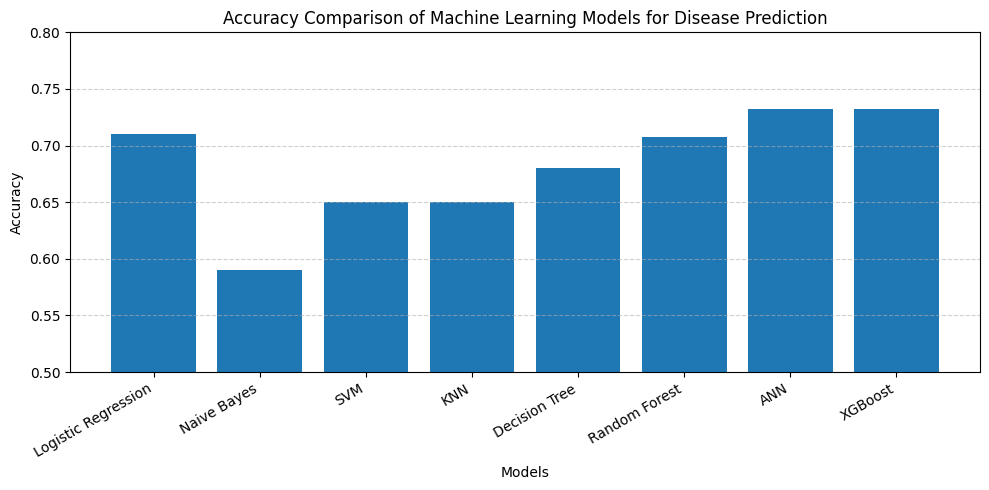

In [21]:
import matplotlib.pyplot as plt

# Final model accuracies (from your experiments)
models = [
    "Logistic Regression",
    "Naive Bayes",
    "SVM",
    "KNN",
    "Decision Tree",
    "Random Forest",
    "ANN",
    "XGBoost"
]

accuracies = [
    0.71,   # Logistic Regression
    0.59,   # Naive Bayes
    0.65,   # SVM
    0.65,   # KNN
    0.68,   # Decision Tree
    0.7074,   # Random Forest
    0.7326,   # ANN
    0.7319    # XGBoost
]

plt.figure(figsize=(10,5))
plt.bar(models, accuracies)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of Machine Learning Models for Disease Prediction")
plt.xticks(rotation=30, ha="right")
plt.ylim(0.50, 0.80)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
